## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time

# reading data
movie_industry = pd.read_csv('movies.csv')

### Data quality check
*By Lilly Sorkin*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [2]:
# getting numeric/continuous predictors
continuous = []
for col in movie_industry.columns:
    if movie_industry.dtypes[col] != object:
        continuous.append(col)
continuous.remove('gross')
continuous        

['year', 'score', 'votes', 'budget', 'runtime']

Text(0, 0.5, 'Count')

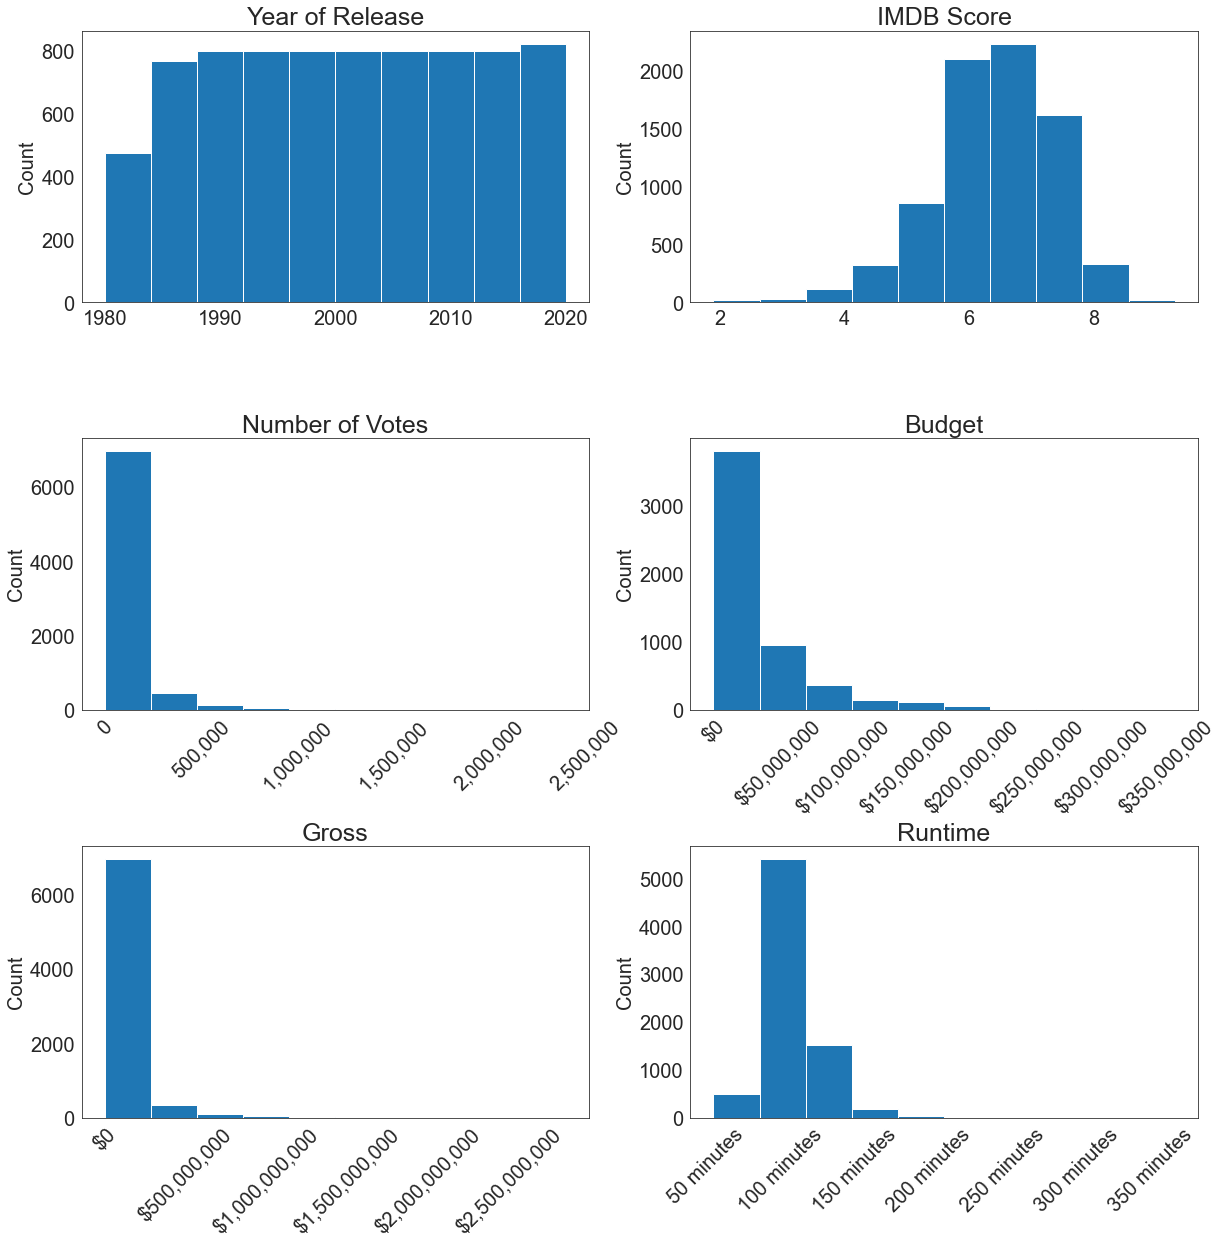

In [3]:
#plotting numeric predictors against count to show distribution
sns.set_style('white')
fig, axes = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

axes[0,0].hist(movie_industry.year)
axes[0,0].set_title('Year of Release', fontsize=25)
axes[0,0].tick_params(axis = 'both',labelsize=20)
axes[0,0].set_ylabel('Count', fontsize=20)

axes[0,1].hist(movie_industry.score)
axes[0,1].set_title('IMDB Score', fontsize=25)
axes[0,1].tick_params(axis = 'both',labelsize=20)
axes[0,1].set_ylabel('Count', fontsize=20)

axes[1,0].hist(movie_industry.votes)
axes[1,0].set_title('Number of Votes', fontsize=25)
axes[1,0].tick_params(axis = 'both',labelsize=20)
axes[1,0].xaxis.set_major_formatter('{x:,.0f}')
axes[1,0].tick_params(axis='x', labelrotation=45)
axes[1,0].set_ylabel('Count', fontsize=20)

axes[1,1].hist(movie_industry.budget)
axes[1,1].set_title('Budget', fontsize=25)
axes[1,1].tick_params(axis = 'both',labelsize=20)
axes[1,1].xaxis.set_major_formatter('${x:,.0f}')
axes[1,1].tick_params(axis='x', labelrotation=45)
axes[1,1].set_ylabel('Count', fontsize=20)

axes[2,0].hist(movie_industry.gross)
axes[2,0].set_title('Gross', fontsize=25)
axes[2,0].tick_params(axis = 'both',labelsize=20)
axes[2,0].xaxis.set_major_formatter('${x:,.0f}')
axes[2,0].tick_params(axis='x', labelrotation=45)
axes[2,0].set_ylabel('Count', fontsize=20)


axes[2,1].hist(movie_industry.runtime)
axes[2,1].set_title('Runtime', fontsize=25)
axes[2,1].tick_params(axis = 'both',labelsize=20)
axes[2,1].xaxis.set_major_formatter('{x:.0f} minutes')
axes[2,1].tick_params(axis='x', labelrotation=45)
axes[2,1].set_ylabel('Count', fontsize=20)

In [4]:
#getting categoric variables that have a reasonable number of different values
categorical = []
for col in movie_industry.columns:
    if movie_industry.dtypes[col] == object:
        categorical.append(col)
categorical.remove('name')
categorical.remove('director')
categorical.remove('released')
categorical.remove('star')
categorical        

['rating', 'genre', 'writer', 'country', 'company']

In [5]:
#dropping rows with null values for data quality check
movie_industry_clean = movie_industry.dropna()
movie_industry_clean.reset_index(inplace=True)

In [6]:
#reducing number of values being plotted so that it's readable
companies = pd.DataFrame(columns=['Company', 'Count'])
companies['Company'] = movie_industry_clean.company.unique()
companies['Count'] = list(movie_industry_clean.company.value_counts(sort=False))
repeated_companies = companies.loc[companies.Count>20]

In [7]:
#reducing number of values being plotted so that it's readable
countries = pd.DataFrame(columns=['Country', 'Count'])
countries['Country'] = movie_industry_clean.country.unique()
countries['Count'] = list(movie_industry_clean.country.value_counts(sort=False))
repeated_countries = countries.loc[countries.Count>3]

Text(0, 0.5, 'Count')

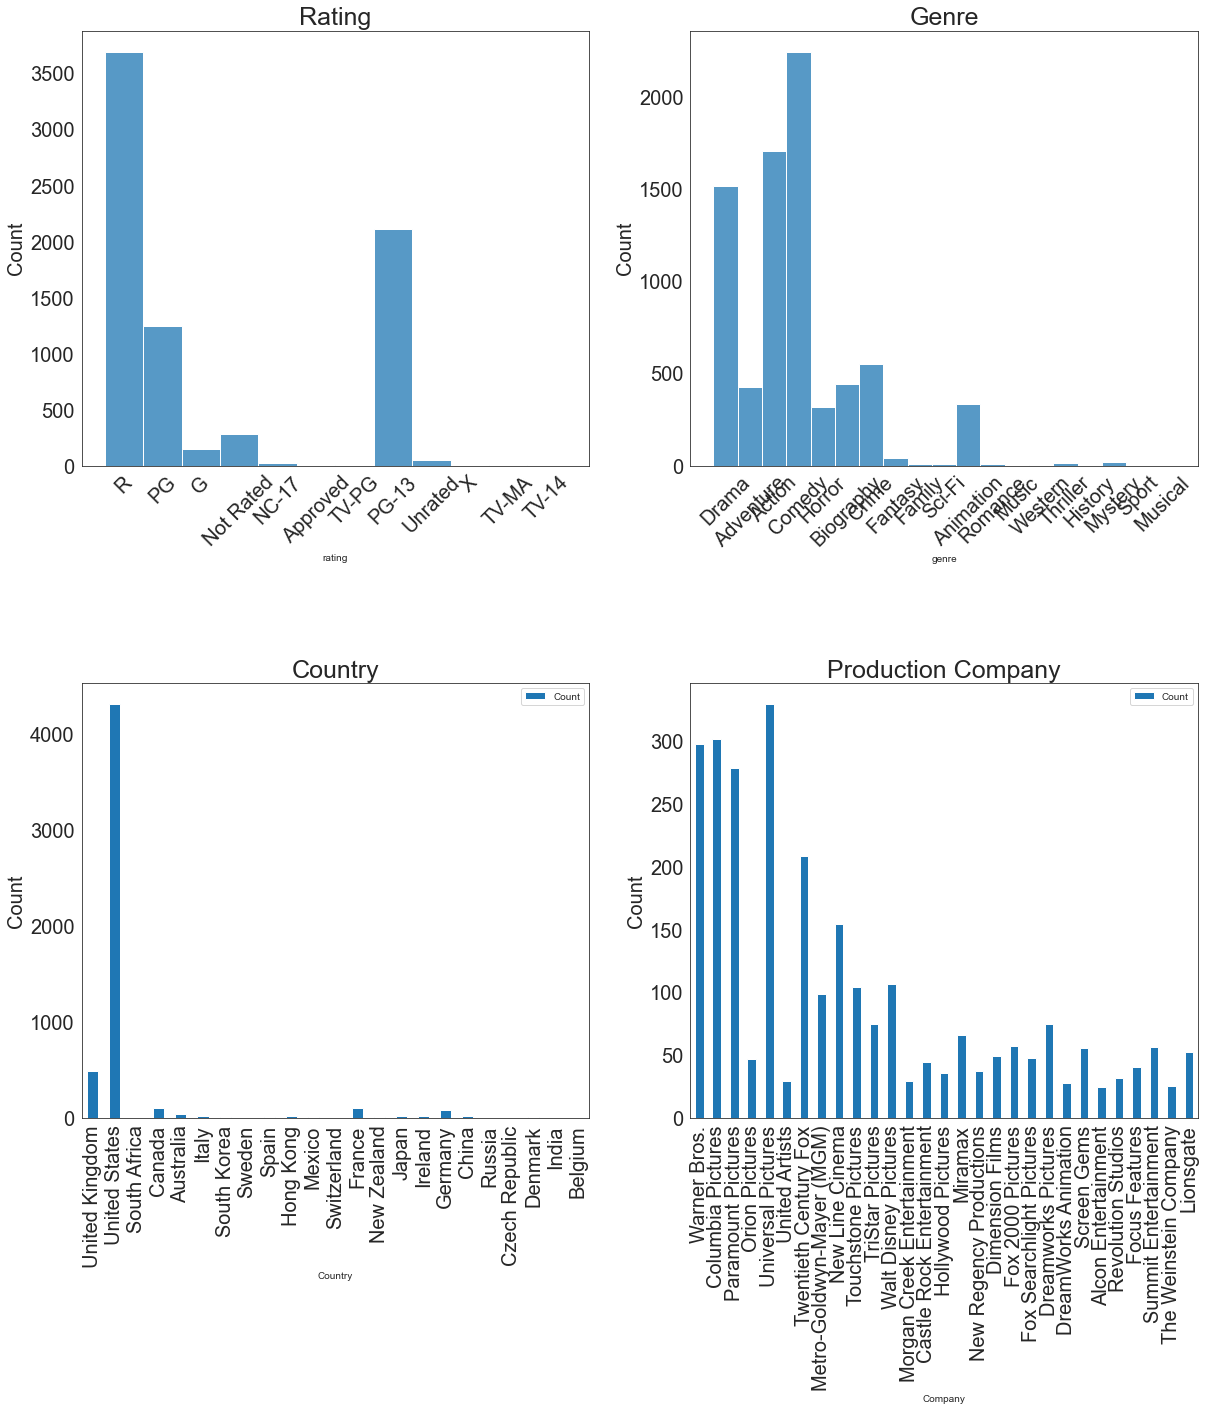

In [8]:
#plotting categoric predictors against count to see distribution
sns.set_style('white')
fig, axes = plt.subplots(2,2,figsize=(20,20))
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

sns.histplot(ax=axes[0,0],x='rating', data = movie_industry)
axes[0,0].set_title('Rating', fontsize=25)
axes[0,0].tick_params(axis = 'both',labelsize=20)
axes[0,0].tick_params(axis='x', labelrotation=45)
axes[0,0].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[0,1], x='genre', data = movie_industry)
axes[0,1].set_title('Genre', fontsize=25)
axes[0,1].tick_params(axis = 'both',labelsize=20)
axes[0,1].tick_params(axis='x', labelrotation=45)
axes[0,1].set_ylabel('Count', fontsize=20)

repeated_countries.plot.bar(ax=axes[1,0], x='Country', y='Count')
axes[1,0].set_title('Country', fontsize=25)
axes[1,0].tick_params(axis = 'both',labelsize=20)
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,0].set_ylabel('Count', fontsize=20)

repeated_companies.plot.bar(ax=axes[1,1], x='Company', y='Count')
axes[1,1].set_title('Production Company', fontsize=25)
axes[1,1].tick_params(axis = 'both',labelsize=20)
axes[1,1].tick_params(axis='x', labelrotation=90)
axes[1,1].set_ylabel('Count', fontsize=20)

In [9]:
predictors = list(movie_industry.columns)
predictors.remove('gross')
predictors.remove('name')

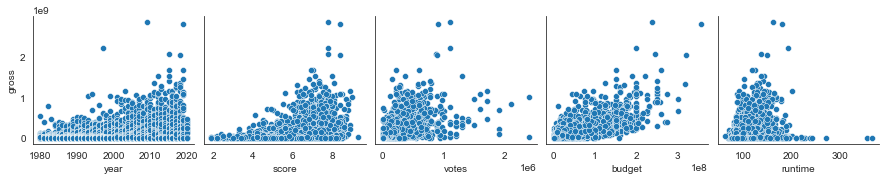

In [10]:
#...Association of the response with the predictors...#
sns.pairplot(movie_industry, y_vars=['gross'], x_vars=continuous)

In [30]:
sns.pairplot(movie_industry, y_vars=['gross'], x_vars=categorical)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fec8639fca0> (for post_execute):


KeyboardInterrupt: 

### Data cleaning
*By Lilly Sorkin*

From the data quality check we realized that:
1. After spending several hours working on it, we discovered that our initial dataset was too dificult to clean. It contained a multitude of listed dictionaries that we were unable to extract information from. As such we turned to our da

2. Some of the columns that we were expecting to be highly important were missing values. For example `budget` was missing 2171 values. Since imputing these values would not provide helpful information for our model, we removed all rows with missing values, leaving us with 5421 data points for our model development.

The code below implements the above cleaning.

In [11]:
movie_industry = pd.read_csv('movies.csv')

In [12]:
#checking for null values
movie_industry.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [13]:
#dropping rows with null values
movie_industry_clean = movie_industry.dropna()
movie_industry_clean.reset_index(inplace=True)

In [14]:
movie_industry_clean.describe()

,index,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,4069.060505,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,2097.297246,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,0.000000,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,2389.000000,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,4187.000000,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,5844.000000,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,7652.000000,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


### Data preparation
*By Lilly Sorkin and Aarti Pappu*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict gross, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. These variables were `month`, `continent`, `decade`.


In [159]:
# data wrangling
def wrangling(df):
    df = df.drop('index', axis=1)
    df.replace(' ', '_', regex=True, inplace = True)
    df.replace('-', '_', regex=True, inplace = True)
    return df

movies = wrangling(movie_industry_clean)

In [160]:
# creating a month variable for each vallue
def month(s):
    month = s.released.partition("_")[0]
    if month in ['June', 'July', 'May', 'December', 'October', 'September','February', 'April', 'August', 'March', 'November', 'January']:
        return month
    else:
        return 'NA'

movies['month'] = movies.apply(month, axis=1)

# dropping the values in which 'month' = NA
movies.drop(movies.loc[movies['month'] == 'NA'].index, inplace=True)

In [161]:
# grouping countries into continents
def continent(s):
    if s['country'] in ['United_States','Mexico', 'Canada','Jamaica']:
        return 'North_America'
    if s['country'] in ['United_Kingdom', 'France', 'Germany', 'Belgium','Spain', 'Norway', 'Iceland', 'West_Germany', 'Ireland', 'Italy', 'Finland', 'Czech_Republic', 'Switzerland', 'Sweden', 'Denmark', 'Netherlands','Federal_Republic_of_Yugoslavia','Yugoslavia', 'Hungary', 'Republic_of_Macedonia', 'Austria','Portugal','Malta']:
        return 'Europe'
    if s['country'] in ['Japan','China','South_Korea', 'Hong_Kong','India','United_Arab_Emirates','Taiwan','Lebanon','Indonesia', 'Iran','Israel','Russia','Thailand']:
        return 'Asia'
    if s['country'] in ['Australia','New_Zealand']:
        return 'Oceania'
    if s['country'] in ['South_Africa', 'Kenya']:
        return 'Africa'
    if s['country'] in ['Brazil', 'Argentina', 'Aruba', 'Chile', 'Panama','Colombia']:
        return 'South_America'
    else:
        return 'NA'

movies['continent'] = movies.apply(continent, axis=1)

In [162]:
# split into training & test
np.random.seed(2)
train = movies.sample(round(movies.shape[0]*0.8)) # 80%
test = movies.drop(train.index)

# Resetting the indices for both test and train
train = train.reset_index()
train = train.drop(['index'], axis=1)
test = test.reset_index()
test = test.drop(['index'], axis=1)

In [319]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [ ]:
######-----------Shuffling the dataset for K-fold------------#########

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [163]:
# the start of a model by hand - NO INTERACTIONS/TRANSFORMATIONS
ols_object = smf.ols(formula = 'gross~+budget+genre+rating+votes+continent+runtime+month+score+year', data = train)
#ols_object = smf.ols(formula = 'gross~budget+votes+runtime+score+year+North_America+Europe+Asia+Oceania+South_America+Comedy+Action+Drama+Biography+Horror+Adventure+Crime+Animation+Fantasy+Thriller+Mystery+Sci_Fi+Family+Romance+PG_13+R+PG+Not_Rated+G+Unrated+X+NC_17+Approved', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     192.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:10:41   Log-Likelihood:                -86374.
No. Observations:                4333   AIC:                         1.728e+05
Df Residuals:                    4288   BIC:                         1.731e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -4.404e+08   3.82e+08     -1.154      0.249   -1.19e+09    3.08e+08
genre[T.Adventure]          6.658e+06   8.06e+06      0.826      0.409   -9.14e+06    2.25e+07
genre[T.Animation]          5.492e+07   1.06e+07      5.189      0.000    3.42e+07    7.57e+07
genre[T.Biography]         -6.668e+06   8.41e+06     -0.793      0.428   -2.32e+07    9.82e+06
genre[T.Comedy]              1.13e+07   4.99e+06      2.264      0.024    1.52e+06    2.11e+07
genre[T.Crime]             -2.728e+06   7.38e+06     -0.369      0.712   -1.72e+07    1.17e+07
genre[T.Drama]              9.542e+05    5.8e+06      0.165      0.869   -1.04e+07    1.23e+07
genre[T.Family]             3.575e+08   5.57e+07      6.421      0.000    2.48e+08    4.67e+08
genre[T.Fantasy]            1.775e+07   1.94e+07      0.916      0.360   -2.02e+07    5.57e+07
genre[T.Horror]             4.206e+07    8.8e+06      4.779      0.000    2.48e+07    5.93e+07
genre[T.Mystery]           -2.179e+07   2.99e+07     -0.730      0.466   -8.03e+07    3.68e+07
genre[T.Romance]            -2.32e+05   6.41e+07     -0.004      0.997   -1.26e+08    1.25e+08
genre[T.Sci_Fi]            -2.052e+07   4.96e+07     -0.413      0.679   -1.18e+08    7.68e+07
genre[T.Thriller]           4.868e+07   4.54e+07      1.073      0.283   -4.02e+07    1.38e+08
genre[T.Western]            2.236e+07   7.84e+07      0.285      0.775   -1.31e+08    1.76e+08
rating[T.G]                -7.427e+07   1.12e+08     -0.664      0.507   -2.94e+08    1.45e+08
rating[T.NC_17]             -5.36e+07   1.17e+08     -0.460      0.646   -2.82e+08    1.75e+08
rating[T.Not_Rated]        -4.043e+07   1.13e+08     -0.357      0.721   -2.63e+08    1.82e+08
rating[T.PG]               -4.353e+07   1.11e+08     -0.392      0.695   -2.61e+08    1.74e+08
rating[T.PG_13]            -5.248e+07   1.11e+08     -0.472      0.637    -2.7e+08    1.66e+08
rating[T.R]                -6.886e+07   1.11e+08     -0.619      0.536   -2.87e+08    1.49e+08
rating[T.TV_MA]            -5.868e+07   1.57e+08     -0.374      0.709   -3.67e+08    2.49e+08
rating[T.Unrated]            -5.7e+07   1.15e+08     -0.497      0.619   -2.82e+08    1.68e+08
rating[T.X]                -1.045e+08   1.57e+08     -0.665      0.506   -4.13e+08    2.04e+08
continent[T.Asia]           2.671e+07    6.5e+07      0.411      0.681   -1.01e+08    1.54e+08
continent[T.Europe]         6.996e+06   6.41e+07      0.109      0.913   -1.19e+08    1.33e+08
continent[T.North_America]   2.04e+07    6.4e+07      0.319      0.750   -1.05e+08    1.46e+08
continent[T.Oceania]        9.305e+06   6.58e+07      0.142      0.887    -1.2e+08    1.38e+08
continent[T.South_America]  2.389e+07    7.5e+07      0.319      0.750   -1.23e+08    1.71e+08
month[T.August]            -1.051e+07   8.1

Text(0, 0.5, 'Residuals')

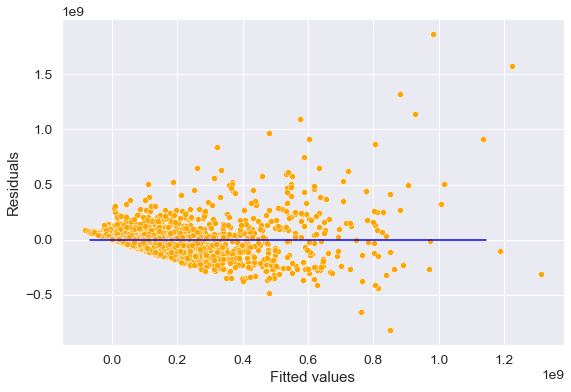

In [164]:
#Plotting residuals vs fitted values
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

isabel

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

artharva, aarti

The following code uses the base model to identify and remove influential points.

In [165]:
#Computing the leverage statistic for each observation
influence = model.get_influence()
leverage = influence.hat_matrix_diag

out = model.outlier_test()

#Average leverage of points
average_leverage = (model.df_model+1)/model.nobs
average_leverage

#We will remove all observations that have leverage higher than the threshold value.
high_leverage_threshold = 4*average_leverage

#Number of high leverage points in the dataset
print(np.sum(leverage>high_leverage_threshold))

#Dropping influential points from data
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0], (np.where(leverage>high_leverage_threshold)[0])))

train_filtered.shape

#Number of points removed as they were influential
print(train.shape[0]-train_filtered.shape[0])

/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


104
6


/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


The following code chunks prepare the data for backwards selection, and then implement backwards selection for the variable (not considering interaction terms).

In [166]:
# Creating dummy variables for the categorical variables to do forward selection 
def dummies_for_categorical_variables(df):
    rating_dummy = pd.get_dummies(df['rating'])
    df = pd.concat([df, rating_dummy], axis=1)
    df = df.drop('rating', axis=1)
    genre_dummy = pd.get_dummies(df['genre'])
    df = pd.concat([df, genre_dummy], axis=1)
    df = df.drop('genre', axis=1)
    continent_dummy = pd.get_dummies(df['continent'])
    df = pd.concat([df, continent_dummy], axis=1)
    df = df.drop('continent', axis=1)
    #decade_dummy = pd.get_dummies(df['decade'])
    #df = pd.concat([df, decade_dummy], axis=1)
    #df = df.drop('decade', axis=1)
    month_dummy = pd.get_dummies(df['month'])
    df = pd.concat([df, month_dummy], axis=1)
    df = df.drop('month', axis=1)
    return df

train_variable_selection = dummies_for_categorical_variables(train)
test = dummies_for_categorical_variables(test)

In [167]:
train_variable_selection.columns

Index(['name', 'year', 'released', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime', 'Approved',
       'G', 'NC_17', 'Not_Rated', 'PG', 'PG_13', 'R', 'TV_MA', 'Unrated', 'X',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci_Fi',
       'Thriller', 'Western', 'Africa', 'Asia', 'Europe', 'North_America',
       'Oceania', 'South_America', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September'],
      dtype='object')

In [168]:
# Creating a set of predictors from which we need to find the best subset of predictors - removing 1 dummy variable
# One level of a categorical variable is removed for each category (genre, month, continent, and rating)
X = train_variable_selection[['name', 'year', 'released', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime', 'Approved',
       'G', 'NC_17', 'Not_Rated', 'PG', 'PG_13', 'R', 'TV_MA', 'Unrated', 'X',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci_Fi',
       'Thriller', 'Western', 'Africa', 'Asia', 'Europe', 'North_America',
       'Oceania', 'South_America', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September']]

In [169]:
# Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('gross~' + '+'.join(predictor_subset),data = train_variable_selection).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [170]:
# Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [171]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [172]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [173]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [ ]:
models_best = backward_selection()

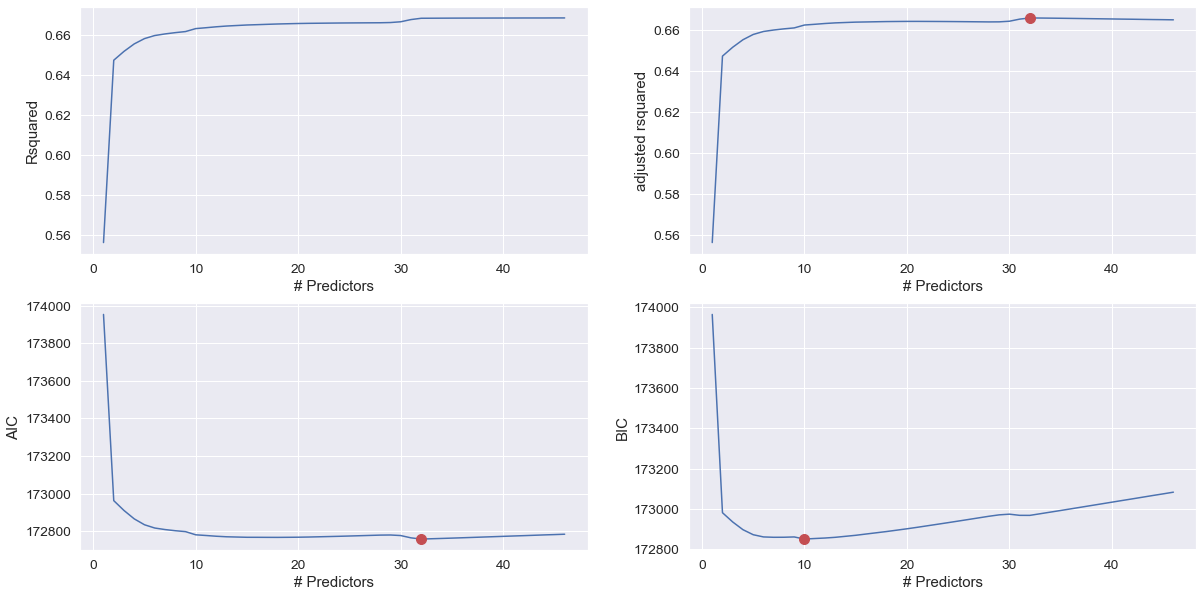

In [115]:
best_sub_plots()

In [116]:
best_fwd_reg_model = models_best['model'][10]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     850.2
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:32:51   Log-Likelihood:                -86380.
No. Observations:                4333   AIC:                         1.728e+05
Df Residuals:                    4322   BIC:                         1.729e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.996e+09   4.53e+08     -4.408      0.000   -2.88e+09   -1.11e+09
budget            2.6043      0.051     51.490      0.000       2.505       2.703
votes           366.8406     10.465     35.054      0.000     346.324     387.357
Animation      5.564e+07   8.11e+06      6.862      0.000    3.97e+07    7.15e+07
two_thousands -2.297e+07   3.83e+06     -6.006      0.000   -3.05e+07   -1.55e+07
R             -1.971e+07   3.63e+06     -5.436      0.000   -2.68e+07   -1.26e+07
Horror         3.763e+07   8.13e+06      4.626      0.000    2.17e+07    5.36e+07
Comedy         1.318e+07   3.95e+06      3.339      0.001    5.44e+06    2.09e+07
October       -1.544e+07   5.66e+06     -2.728      0.006   -2.65e+07   -4.34e+06
eighties       3.106e+07   6.44e+06      4.825      0.000    1.84e+07    4.37e+07
year           9.831e+05   2.26e+05      4.350      0.000     5.4e+05    1.43e+06
==============================================================================
Omnibus:                     3892.520   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426388.646
Skew:                           3.830   Prob(JB):                         0.00
Kurtosis:                      50.990   Cond. No.                     1.48e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We also wanted to consider interaction terms while performing backward variable selection. However, due to the vast number of categorical variables, we were not able to feasibly do variable selection with all of the variables. As a result, we decided to consider only the interaction terms between the number variables (`year`,`budget`, `votes`, `score`, and `runtime`)

In [114]:
#Creating a dataframe with all the predictors
X = train_variable_selection[intersection]
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train_variable_selection[intersection]

In [138]:
#Creating a dataframe with all the predictors
X = train[['year', 'score', 'votes', 'budget','runtime']]
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train[['year', 'score', 'votes', 'budget','runtime']]

In [139]:
X_backup

,year,score,votes,budget,runtime
0,2005,3.7,35000.0,18000000.0,100.0
1,2016,6.8,21000.0,30000000.0,89.0
2,1996,4.4,26000.0,15000000.0,88.0
3,1993,6.4,24000.0,20000000.0,107.0
4,2019,6.0,162000.0,170000000.0,132.0
...,...,...,...,...,...
4328,2016,5.4,110000.0,140000000.0,127.0
4329,2013,7.0,721000.0,225000000.0,143.0
4330,1995,7.3,103000.0,3500000.0,91.0
4331,2011,7.1,218000.0,12500000.0,101.0


In [140]:
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train_variable_selection['_'.join(combo)] = train_variable_selection[combo[0]]*train_variable_selection[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train_variable_selection.loc[:,'_'.join(combo)] 

/var/folders/xt/lxvdtltj1hv8z26182tskp7m0000gp/T/ipykernel_65862/2505225237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train_variable_selection.loc[:,'_'.join(combo)]
/var/folders/xt/lxvdtltj1hv8z26182tskp7m0000gp/T/ipykernel_65862/2505225237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train_variable_selection.loc[:,'_'.join(combo)]
/var/folders/xt/lxvdtltj1hv8z26182tskp7m0000gp/T/ipykernel_65862/2505225237.py:6: SettingWithCopyWarning: 

In [143]:
models_best = backward_selection()

Processed  15 models on 14 predictors in 0.7990460395812988 seconds.
Processed  14 models on 13 predictors in 0.424954891204834 seconds.
Processed  13 models on 12 predictors in 0.39340901374816895 seconds.
Processed  12 models on 11 predictors in 0.38945603370666504 seconds.
Processed  11 models on 10 predictors in 0.2312169075012207 seconds.
Processed  10 models on 9 predictors in 0.22357773780822754 seconds.
Processed  9 models on 8 predictors in 0.16992497444152832 seconds.
Processed  8 models on 7 predictors in 0.15555977821350098 seconds.
Processed  7 models on 6 predictors in 0.10968613624572754 seconds.
Processed  6 models on 5 predictors in 0.08081293106079102 seconds.
Processed  5 models on 4 predictors in 0.08435988426208496 seconds.
Processed  4 models on 3 predictors in 0.06113624572753906 seconds.
Processed  3 models on 2 predictors in 0.034150123596191406 seconds.
Processed  2 models on 1 predictors in 0.02143383026123047 seconds.
Total elapsed time: 3.3513548374176025 s

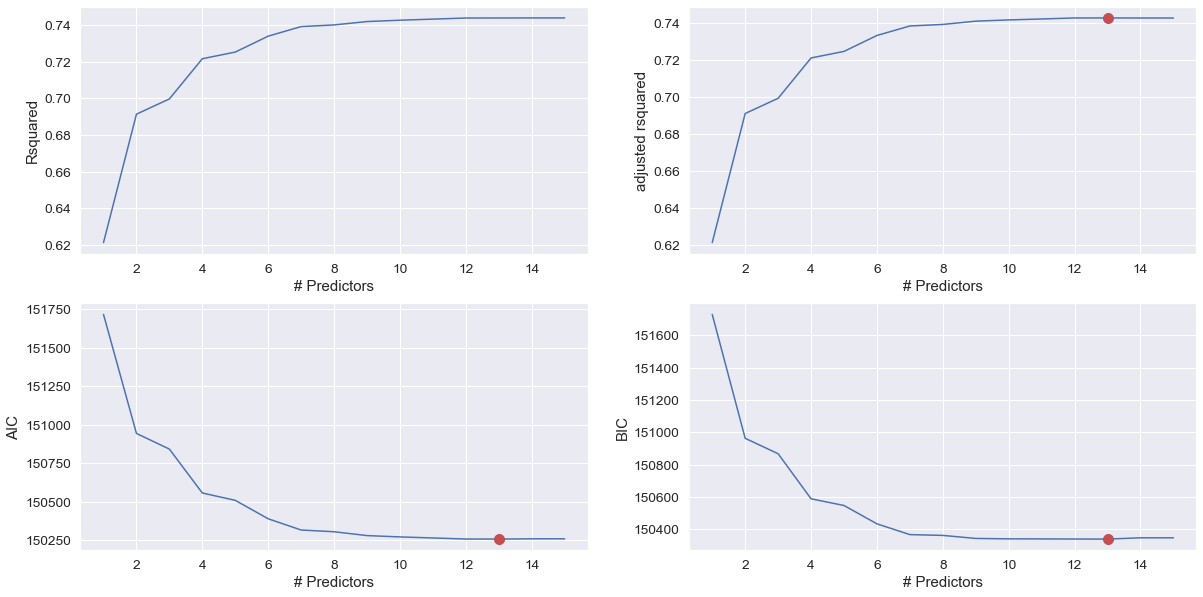

In [144]:
best_sub_plots()

In [145]:
best_bwd_reg_model = models_best['model'][13]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     913.9
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:52:04   Log-Likelihood:                -75117.
No. Observations:                3791   AIC:                         1.503e+05
Df Residuals:                    3778   BIC:                         1.503e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.978e+05   8.42e+04      5.910      0.000    3.33e+05    6.63e+05
votes           1.795e+04   2549.686      7.040      0.000     1.3e+04    2.29e+04
budget          -168.2822     11.007    -15.288      0.000    -189.863    -146.701
runtime          2.39e+07   4.04e+06      5.908      0.000     1.6e+07    3.18e+07
year_score      1055.4179   1120.324      0.942      0.346   -1141.081    3251.916
year_votes        -7.8649      1.258     -6.251      0.000     -10.332      -5.398
year_budget        0.0825      0.005     15.037      0.000       0.072       0.093
year_runtime   -1.169e+04   2020.668     -5.786      0.000   -1.57e+04   -7730.883
score_votes     -278.8495     14.420    -19.337      0.000    -307.122    -250.577
score_budget       0.7450      0.059     12.569      0.000       0.629       0.861
score_runtime  -1.071e+05   2.68e+04     -3.990      0.000    -1.6e+05   -5.45e+04
votes_budget    2.348e-06   2.07e-07     11.334      0.000    1.94e-06    2.75e-06
votes_runtime      1.9150      0.491      3.902      0.000       0.953       2.877
budget_runtime    -0.0065      0.002     -3.024      0.003      -0.011      -0.002
==============================================================================
Omnibus:                     2683.906   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150468.886
Skew:                           2.766   Prob(JB):                         0.00
Kurtosis:                      33.364   Cond. No.                     1.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
# SQUARE ROOT of the model
ols_object = smf.ols(formula = 'np.sqrt(gross)~votes+budget+runtime+year*votes+year*budget+year*runtime+score*votes+score*budget+score*runtime+votes*budget+votes*runtime+budget*runtime+month+genre*budget+rating', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     573.0
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:04:02   Log-Likelihood:                -40780.
No. Observations:                4333   AIC:                         8.162e+04
Df Residuals:                    4304   BIC:                         8.180e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -78.5988     29.888     -2.630      0.009    -137.195     -20.003
month[T.August]              37.2345    225.220      0.165      0.869    -404.314     478.783
month[T.December]           636.5832    228.730      2.783      0.005     188.154    1085.013
month[T.February]           217.9629    228.046      0.956      0.339    -229.125     665.051
month[T.January]            153.1505    224.149      0.683      0.494    -286.297     592.598
month[T.July]               694.5843    226.431      3.068      0.002     250.663    1138.506
month[T.June]               454.7943    233.437      1.948      0.051      -2.863     912.452
month[T.March]             -138.7261    222.294     -0.624      0.533    -574.536     297.084
month[T.May]                -38.8411    233.400     -0.166      0.868    -496.425     418.743
month[T.November]           -21.5526    220.471     -0.098      0.922    -453.790     410.685
month[T.October]           -340.8824    213.670     -1.595      0.111    -759.785      78.020
month[T.September]         -380.9585    227.054     -1.678      0.093    -826.100      64.183
genre[T.Adventure]         -955.1296    289.387     -3.301      0.001   -1522.478    -387.781
genre[T.Animation]         2111.0501    426.889      4.945      0.000    1274.127    2947.973
genre[T.Biography]          -54.7722    337.877     -0.162      0.871    -717.185     607.640
genre[T.Comedy]            -344.3922    195.914     -1.758      0.079    -728.485      39.701
genre[T.Crime]             -861.4539    286.659     -3.005      0.003   -1423.454    -299.454
genre[T.Drama]             -748.4769    213.418     -3.507      0.000   -1166.886    -330.068
genre[T.Family]              55.7034     83.416      0.668      0.504    -107.835     219.242
genre[T.Fantasy]           -653.6238    667.396     -0.979      0.327   -1962.063     654.815
genre[T.Horror]             267.4202    314.758      0.850      0.396    -349.667     884.507
genre[T.Mystery]          -1705.0821   1135.581     -1.502      0.133   -3931.406     521.241
genre[T.Romance]              8.2765      3.013      2.747      0.006       2.369      14.184
genre[T.Sci_Fi]            -439.4103   1794.538     -0.245      0.807   -3957.629    3078.809
genre[T.Thriller]            -2.1465     15.349     -0.140      0.889     -32.238      27.945
genre[T.Western]             -0.7607      0.362     -2.099      0.036      -1.471      -0.050
rating[T.G]                1489.0516    380.638      3.912      0.000     742.804    2235.299
rating[T.NC_17]            -888.6758    816.325     -1.089      0.276   -2489.093     711.741
rating[T.Not_Rated]        -861.8110    533.300     -1.616      0.106   -1907.354     183.732
rating[T.PG]               1636.6851    226.555      7.224      0.000    11

We first wanted to visualize the 

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [ ]:
aaarti, artharva

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.

In [ ]:
artharva